In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
%matplotlib inline

In [5]:
# sensor_data_increased load
root_path = './'

dataset_train = pd.read_excel(''.join([root_path,'INET_179EA_DATA_0306.xlsx']), sep=' ')
dataset_train.columns

# 데이터 반틈으로 분할
div = int(len(dataset_train)/2)
data1 = dataset_train.iloc[:div,:]
data2 = dataset_train.iloc[div:,:]
data2 = data2.reset_index(drop=True)

Index(['CurrentTemp1', 'CurrentTemp2', 'CurrentTemp3', 'CurrentTemp4',
       'CurrentTemp5', 'InjEndPosi', 'ClpOpnTime', 'ClpClsTime', 'ChargeTime',
       'CycleTime', 'TurnPosi', 'TurnPress', 'Label'],
      dtype='object')

In [181]:
### 라벨링된 데이터 프레임 생성
def make_labeled_df(X_1, X_2):
    df1 = pd.DataFrame(X_1)
    df1['label'] = data1.iloc[:,-1]
    df2 = pd.DataFrame(X_2)
    df2['label'] = data2.iloc[:,-1]
    return (df1, df2)

In [186]:
### 2차원 plot
def plot_2D_line_scatter(df1, df2):
    c_list=['r','y']
    df_list=[df1, df2]
    for j in df_list:
        plt.figure(figsize=(8,4))
        plt.plot(j.iloc[:,:-1])
        plt.show()
        plt.figure(figsize=(8,8))
        for i,g in enumerate(j.groupby('label')):
            plt.scatter(g[1][0],g[1][1], c = c_list[i], label='group {}'.format(int(g[0])), alpha=1)
        plt.legend()
        plt.show()

In [244]:
m=[]
for i in range(len(reduced_df1)):
    if reduced_df1['label'][i]==0:
        m.append(i)
print(m)

[184, 314, 328]


In [311]:
### 2차원 plot 변형
def plot_2D(df1, df2):
    c_list=['r','y']
    df_list=[df1, df2]
    m=[]
    for i in range(len(df1)):
        if reduced_df1['label'][i]==0:
            m.append(i)
    for j in df_list:
        plt.figure(figsize=(8,4))
        plt.plot(j.iloc[:,:-1], alpha=0.6)
        plt.scatter(m, j.iloc[m,0], c='r')
        plt.scatter(m, j.iloc[m,1], c='magenta')
        plt.show()
        plt.figure(figsize=(8,8))
        for i,g in enumerate(j.groupby('label')):
            plt.scatter(g[1][0],g[1][1], c = c_list[i], label='group {}'.format(int(g[0])), alpha=0.6)
        plt.legend()
        plt.show()

In [234]:
### 선형 pca 학습
pca = PCA(n_components=2)
X_reduced1 = pca.fit_transform(data1.iloc[:,:-1])
X_reduced2 = pca.fit_transform(data2.iloc[:,:-1])

In [235]:
sum(pca.explained_variance_ratio_)

0.8840528352961178

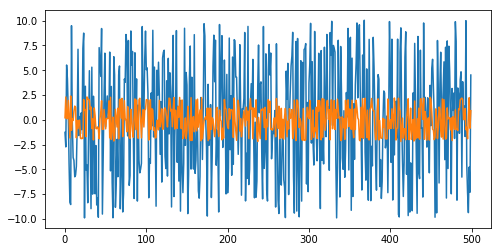

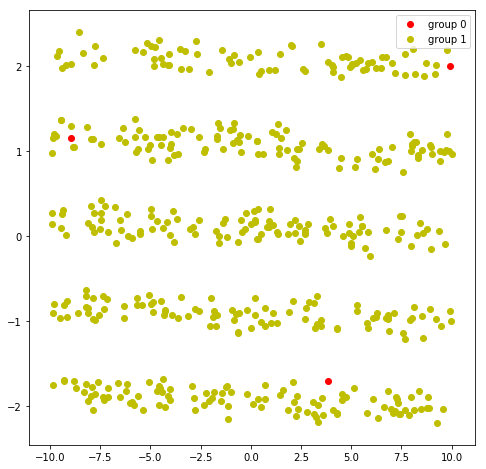

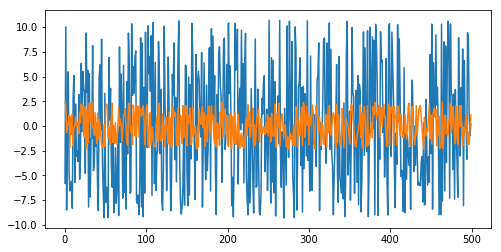

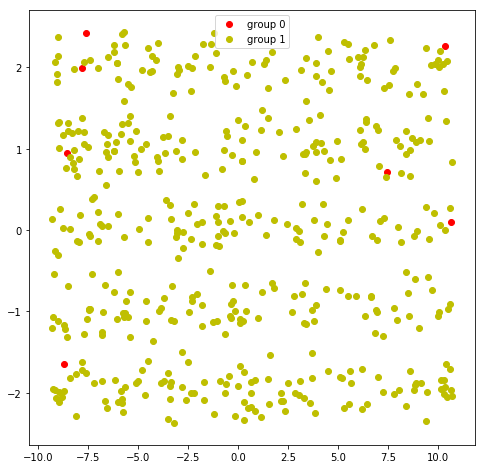

In [236]:
reduced_df1, reduced_df2 = make_labeled_df(X_reduced1, X_reduced2)
plot_2D_line_scatter(reduced_df1, reduced_df2)


In [304]:
reduced_df1.iloc[m,1]

184   -1.701763
314    1.151856
328    1.994359
Name: 1, dtype: float64

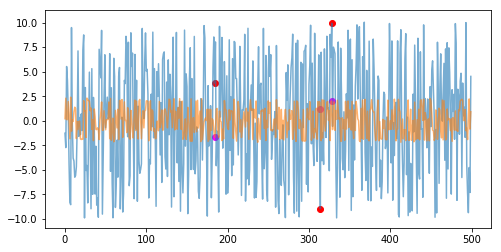

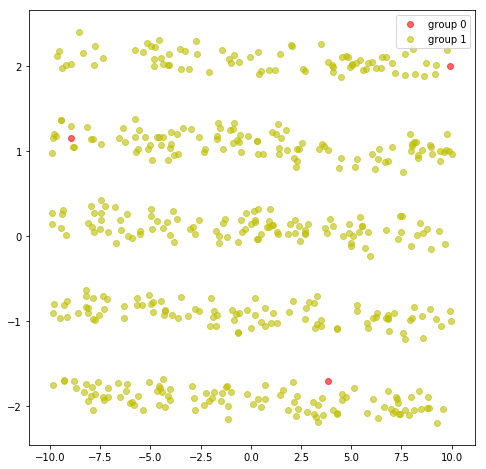

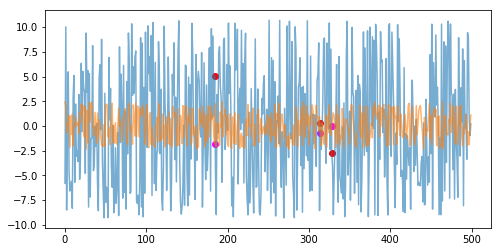

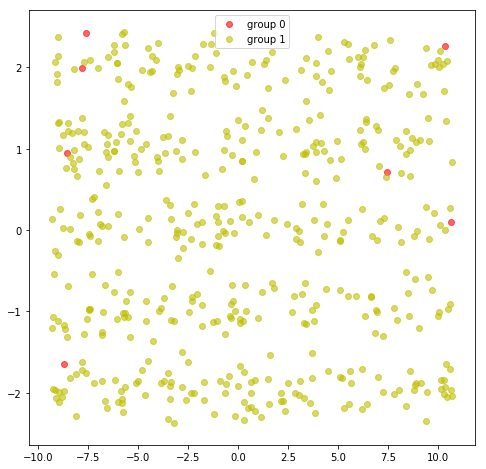

In [312]:
plot_2D(reduced_df1, reduced_df2)

In [191]:
reduced_df=[reduced_df1, reduced_df2]

In [176]:
### 랜덤 pca 학습
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_rnd_reduced1 = rnd_pca.fit_transform(data1.iloc[:,:-1])
X_rnd_reduced2 = rnd_pca.fit_transform(data2.iloc[:,:-1])


In [162]:
sum(rnd_pca.explained_variance_ratio_)

0.8840528352961177

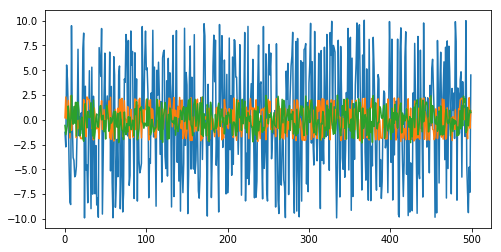

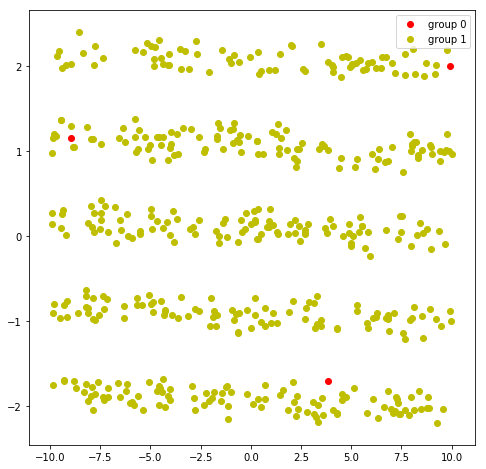

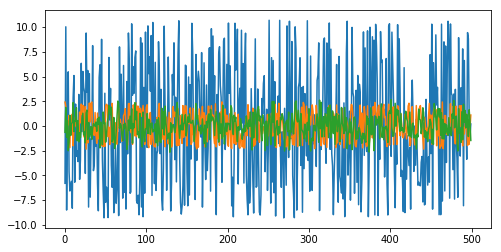

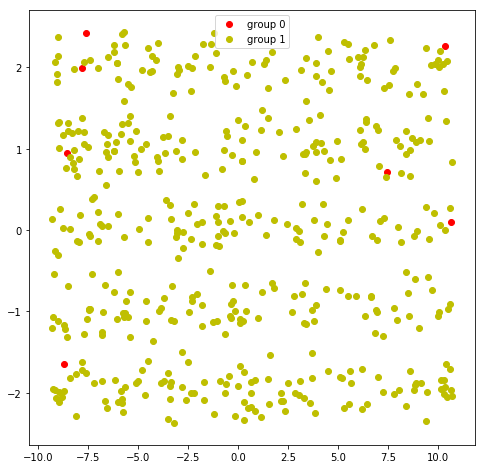

In [188]:
rnd_reduced_df1, rnd_reduced_df2 = make_labeled_df(X_rnd_reduced1, X_rnd_reduced2)
plot_2D_line_scatter(rnd_reduced_df1,rnd_reduced_df2)

In [196]:
rnd_reduced_df =[rnd_reduced_df1, rnd_reduced_df2]

In [166]:
### 커널 PCA 학습-rbf
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_rbf_reduced1 = rbf_pca.fit_transform(data1.iloc[:,:-1])
X_rbf_reduced2 = rbf_pca.fit_transform(data2.iloc[:,:-1])

In [168]:
#sum(rbf_pca.)

array([8.52616588e-16, 2.73392420e-15])

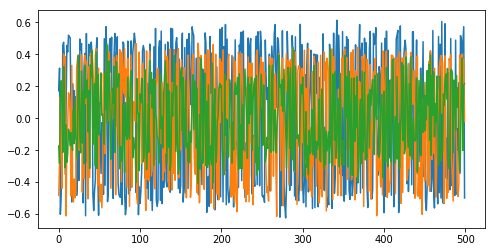

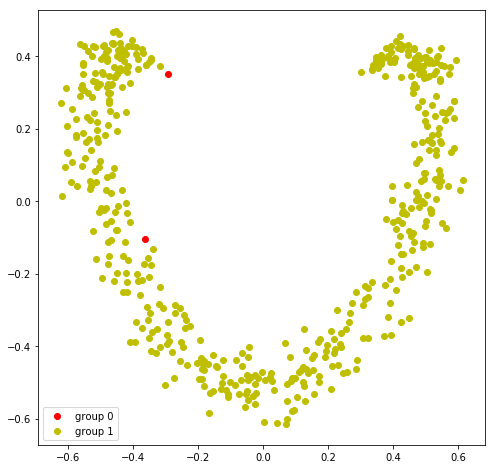

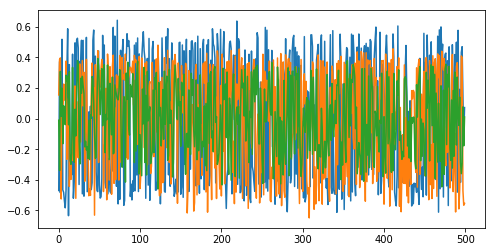

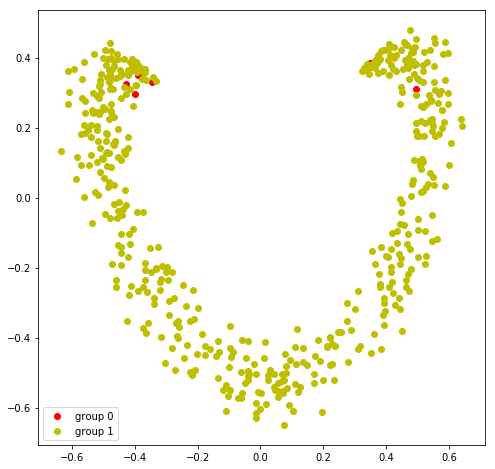

In [189]:
rbf_reduced_df1, rbf_reduced_df2 = make_labeled_df(X_rbf_reduced1, X_rbf_reduced2)
plot_2D_line_scatter(rbf_reduced_df1, rbf_reduced_df2)

In [192]:
rbf_reduced_df = [rbf_reduced_df1, rbf_reduced_df2]

In [173]:
### isomap 학습
X_iso1 = Isomap(n_neighbors=2, n_components=2).fit_transform(data1.iloc[:,:-1])
X_iso2 = Isomap(n_neighbors=2, n_components=2).fit_transform(data2.iloc[:,:-1])

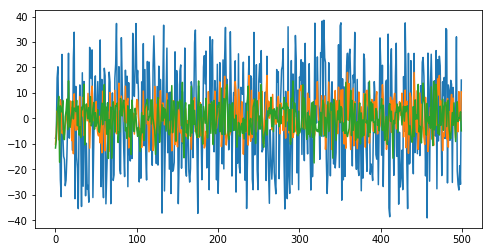

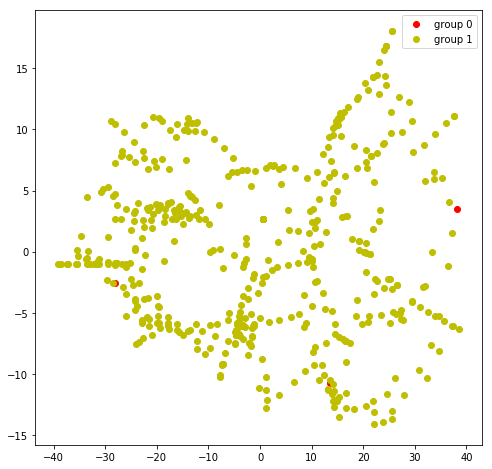

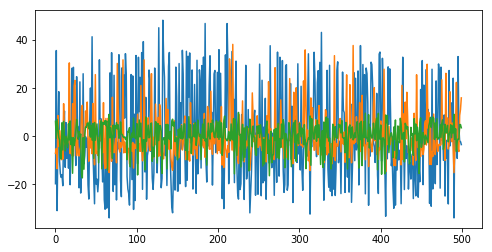

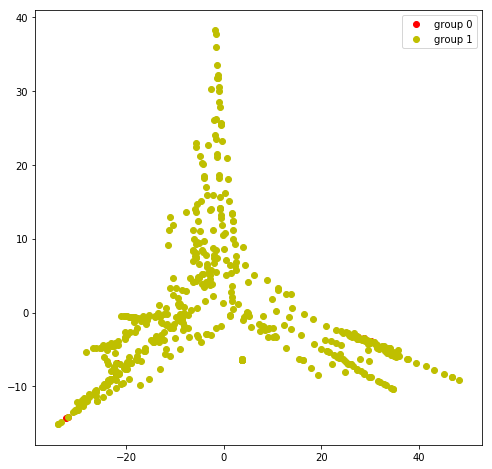

In [190]:
iso_df1, iso_df2 = make_labeled_df(X_iso1, X_iso2)
plot_2D_line_scatter(iso_df1, iso_df2)

In [193]:
iso_df=[iso_df1, iso_df2]

In [177]:
### 선형 pca 학습
pca = PCA(n_components=3)
X_reduced1 = pca.fit_transform(data1.iloc[:,:-1])
X_reduced2 = pca.fit_transform(data2.iloc[:,:-1])

### 랜덤 pca 학습
rnd_pca = PCA(n_components=3, svd_solver="randomized")
X_rnd_reduced1 = rnd_pca.fit_transform(data1.iloc[:,:-1])
X_rnd_reduced2 = rnd_pca.fit_transform(data2.iloc[:,:-1])


### 커널 PCA 학습-rbf
rbf_pca = KernelPCA(n_components = 3, kernel="rbf", gamma=0.04)
X_rbf_reduced1 = rbf_pca.fit_transform(data1.iloc[:,:-1])
X_rbf_reduced2 = rbf_pca.fit_transform(data2.iloc[:,:-1])

### isomap 학습
X_iso1 = Isomap(n_neighbors=2, n_components=3).fit_transform(data1.iloc[:,:-1])
X_iso2 = Isomap(n_neighbors=2, n_components=3).fit_transform(data2.iloc[:,:-1])

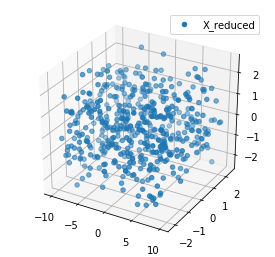

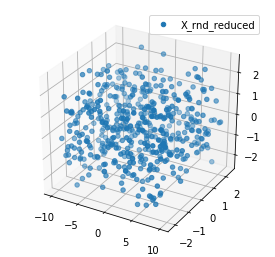

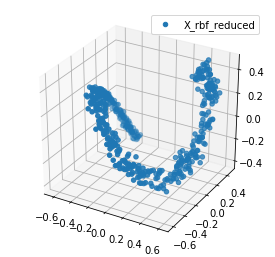

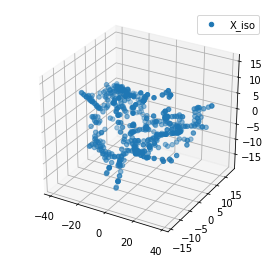

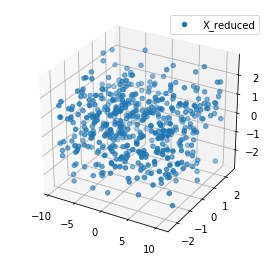

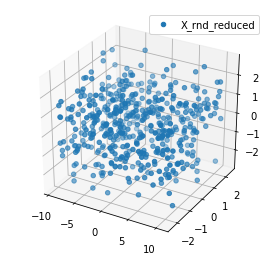

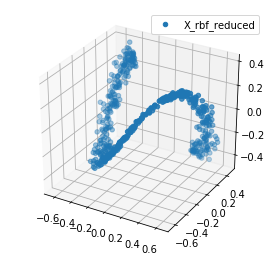

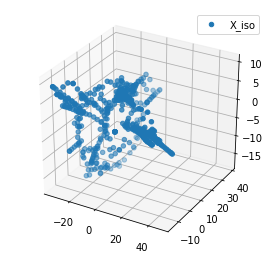

In [218]:
# 3차원 이미지 그리기
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for j in range(len(reduced_df)):
    algo_list = {'X_reduced':reduced_df[j], 'X_rnd_reduced':rnd_reduced_df[j], 'X_rbf_reduced':rbf_reduced_df[j], 'X_iso':iso_df[j]}
    i=1
    for algo in algo_list.keys():
        fig = plt.figure(figsize=(10,20))
        ax=fig.add_subplot(len(algo_list),2,i+j*len(algo_list), projection='3d')
        X = algo_list[algo].iloc[:,0]
        Y = algo_list[algo].iloc[:,1]
        Z = algo_list[algo].iloc[:,2]
        ax.scatter(X, Y, Z, label=algo)
        ax.legend()
        ax.figure
        i += 1



C:\Users\ARA\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


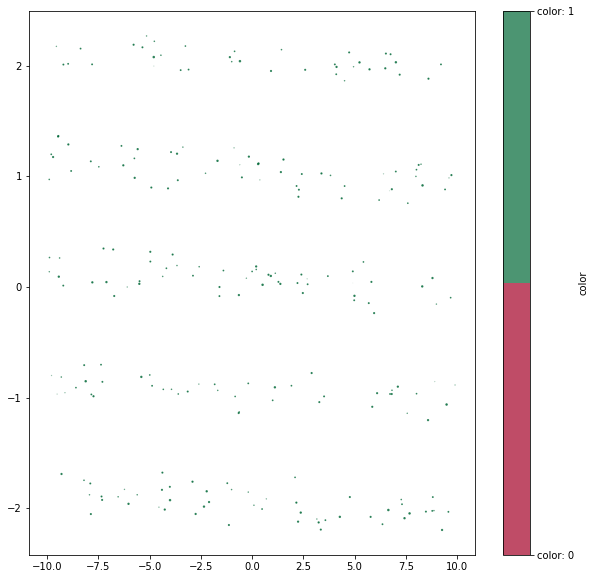

In [60]:
"""
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df1[0],df1[1],df1[2], alpha=0.7, c=df1['label'], cmap=cm.get_cmap('RdYlGn', 2))
plt.colorbar(ticks=range(2), format='color: %d', label='color')
"""

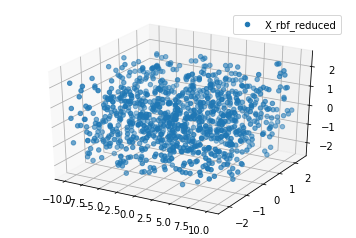

In [229]:
"""
# 1개짜리 3차원 이미지 그리기
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.gca(projection='3d')
X = X_reduced[:,0]
Y = X_reduced[:,1]
Z = X_reduced[:,2]
ax.scatter(X, Y, Z, label='X_rbf_reduced')
ax.legend()

plt.show()
"""

In [84]:
"""
# PM_train load
root_path = './'

dataset_train = pd.read_csv(''.join([root_path,'PM_train.txt']), sep=' ', header=None,engine='python').drop([26,27], axis=1)

col_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 
            's8', 's9', 's10', 's11', 's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

dataset_train.columns = col_names
"""
"""
# sensor data set load
data = pd.read_csv('INET_179EA_DATA_한글번역.csv', sep=',', engine='python')
# sensor 데이터를 matrix로 변환시킨 후 t-SNE 적용
dataset_train = data.iloc[:,5:-1].values
"""

C:\Users\ARA\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


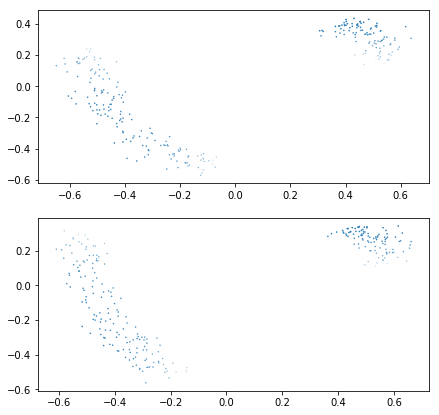

In [228]:
"""
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.scatter(a[:,0],a[:,1],a[:,2])
ax2.scatter(b[:,0],b[:,1],b[:,2])
"""

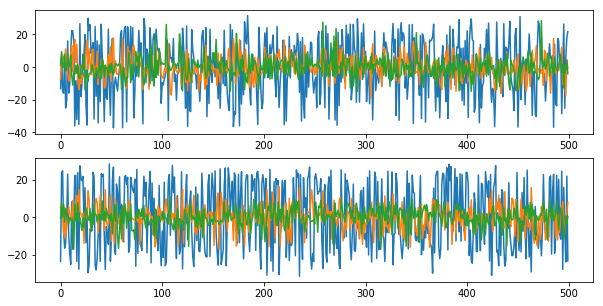

In [233]:
"""
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(a)
ax2.plot(b)
"""

C:\Users\ARA\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


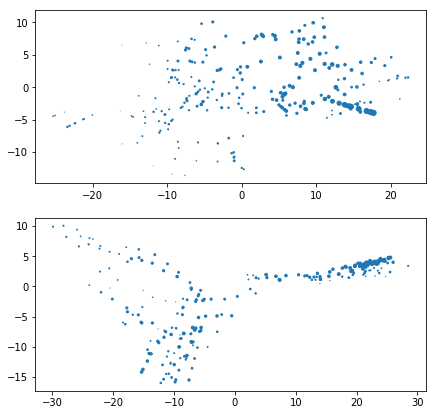

In [234]:
"""
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.scatter(a[:,0],a[:,1],a[:,2])
ax2.scatter(b[:,0],b[:,1],b[:,2])
"""